<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r6-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [ ]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [ ]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-1-r6.csv?token=AKVFSOGWII4PQBWODYO56AC63I2IK')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-11-r6.csv?token=AKVFSODRMP7WFOTNGA43XEC63I2IO')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-4-m-1-r6.csv?token=AKVFSOC3MOPFTWRIVZLY6LS63I2IQ')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-4-m-11-r6.csv?token=AKVFSODK22XN2JMTYPDYVR263I2IS')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-6-m-1-r6.csv?token=AKVFSOCEJ6B3NQ55JTNCARC63I2IW')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-6-m-11-r6.csv?token=AKVFSODSV3TWB37PLTXP5N263I2IY')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-9-m-1-r6.csv?token=AKVFSOBUT6AUV234ESMEP7C63I2I2')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-9-m-11-r6.csv?token=AKVFSOGWJA7N54BQOK6VAUC63I2I4')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-normal-n-0-15-r6.csv?token=AKVFSOB5PQW5BFUJQL6FMNK63I2I6')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-normal-n-0-4-r6.csv?token=AKVFSOFMX5VZZ2Q7ETLNRK263I2JC')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-normal-n-0-6-r6.csv?token=AKVFSOBWUELYDHYMY6UP3H263I2JG')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-normal-n-0-9-r6.csv?token=AKVFSOHVQOHGL5ZIXZ7FYWC63I2JI')

In [13]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(55271, 26)
(56593, 26)
(64885, 26)
(66246, 26)
(104440, 26)
(105875, 26)
(52513, 26)
(53723, 26)
(37247, 26)
(46610, 26)
(86520, 26)
(34507, 26)


In [ ]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r6-train.csv',index=False)

In [15]:
df = pd.read_csv('fft-r6-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,6,6,23,7,2,1,0,0.000000,4,115,1,115,115,0,8,3,27,0
1,7,2,0,1,1,4,3,9,6,6,23,7,3,1,0,0.000000,4,131,1,131,131,0,12,3,27,0
2,7,2,0,1,1,4,3,9,6,6,23,7,2,1,0,0.000000,4,101,1,101,101,0,8,3,27,1
3,15,2,4,1,1,4,3,9,4,4,23,7,2,3,2,0.666667,12,66,1,66,66,8,8,3,27,1
4,15,2,4,1,1,4,3,9,4,4,23,7,2,3,2,0.666667,12,81,1,81,81,8,8,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764425,3276717,2,0,6,4,2,3,10,22,6,23,7,30093,1,0,0.000000,25,5,27,31,135,0,1444464,18,180,0
764426,3276724,2,0,6,5,3,3,10,22,6,23,7,30093,1,0,0.000000,32,4,28,31,112,0,2708370,18,180,0
764427,3276725,2,0,2,1,4,3,11,22,6,23,7,30094,1,0,0.000000,32,3,29,31,87,0,240752,6,66,0
764428,3276726,2,0,7,1,4,3,12,22,6,15,15,30093,3,0,0.000000,6,2,30,31,60,0,842604,21,252,0


In [16]:
df.shape

(764430, 26)

Test Data

In [ ]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-12-r6.csv?token=AKVFSOGFXPLRBVFF2CSTSU263I2RE')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-15-m-7-r6.csv?token=AKVFSOCFZYWDIHTDXDL47DC63I2RG')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-4-m-12-r6.csv?token=AKVFSOCCRFXVSA5QWAACUYK63I2RK')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-4-m-7-r6.csv?token=AKVFSOCAYF5PLB6ZUSDXOCC63I2RQ')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-6-m-12-r6.csv?token=AKVFSOFOPN43UOJJPCWRG5S63I2RS')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-6-m-7-r6.csv?token=AKVFSOBKMXLJPAJAY433G4263I2RU')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-9-m-12-r6.csv?token=AKVFSOGZOPDPGPZ3CINKWVK63I2RY')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r6/2-fft-malicious-n-0-9-m-7-r6.csv?token=AKVFSOH3IVE45S3ZS5CS43S63I2R4')

In [18]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(53634, 26)
(74541, 26)
(63254, 26)
(84594, 26)
(102690, 26)
(123943, 26)
(50769, 26)
(72102, 26)


In [19]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,6,6,23,7,3,1,0,0.00,4,131,1,131,131,0,12,3,27,0
1,54,0,2,4,1,1,5,17,23,7,6,6,3,1,1,1.00,8,130,2,131,260,0,12,20,340,0
2,55,0,2,4,2,2,5,17,23,7,6,6,3,1,1,1.00,9,129,3,131,387,0,48,20,340,0
3,56,0,2,4,3,2,5,17,23,7,6,6,3,1,1,1.00,10,128,4,131,512,0,72,20,340,0
4,57,0,2,4,4,2,5,17,23,7,6,6,3,1,1,1.00,11,127,5,131,635,0,96,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104435,3266195,4,2,4,1,1,5,17,23,7,0,0,30088,4,1,0.25,9,5,16,20,80,8,120352,20,340,0
104436,3266196,4,2,4,2,2,5,17,23,7,0,0,30088,4,1,0.25,10,4,17,20,68,8,481408,20,340,0
104437,3266197,4,2,4,3,2,5,17,23,7,0,0,30088,4,1,0.25,11,3,18,20,54,8,722112,20,340,0
104438,3266198,4,2,4,4,2,5,17,23,7,0,0,30088,4,1,0.25,12,2,19,20,38,8,962816,20,340,0


Processing

In [20]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [ ]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [22]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.192549,-0.058579,-0.002192,0.003312,0.142601,0.163246,-0.004521,0.247456,-0.493926,-0.689430,-0.276991,-0.060553,-0.016865,-0.056895,-0.050165,0.526332,-0.020444,0.060773,0.134785,-0.009771
inport,-0.192549,1.000000,-0.039766,-0.009658,0.014640,0.088294,-0.000329,-0.021270,0.471152,0.608109,0.500225,0.138762,-0.103641,-0.146014,-0.183473,-0.149219,0.634961,-0.020004,0.034719,0.031688,-0.043331
cache_coherence_type,-0.058579,-0.039766,1.000000,0.268724,-0.407284,-0.221212,-0.247738,0.043264,-0.145490,-0.087850,-0.060552,-0.172053,0.041958,-0.013487,0.020923,0.015270,-0.085065,0.306501,0.662477,0.144089,0.000281
flit_id,-0.002192,-0.009658,0.268724,1.000000,-0.017910,0.202483,0.184744,0.008401,0.041662,0.008967,-0.017470,0.381272,-0.021566,0.031129,0.007028,0.004986,-0.016750,0.646466,0.379214,0.300288,0.000952
flit_type,0.003312,0.014640,-0.407284,-0.017910,1.000000,-0.306900,-0.280013,-0.012743,-0.063151,-0.013587,0.026483,0.378070,-0.039427,0.025793,-0.010020,-0.006492,0.025380,0.123928,-0.574754,-0.455135,-0.001447
vnet,0.142601,0.088294,-0.221212,0.202483,-0.306900,1.000000,0.980389,-0.034905,0.256014,0.069374,0.105519,-0.432091,-0.030304,0.048248,0.013188,0.009539,0.225731,-0.047581,0.583976,0.928159,-0.010208
vc,0.163246,-0.000329,-0.247738,0.184744,-0.280013,0.980389,1.000000,-0.034994,0.196585,-0.023709,0.016252,-0.422134,-0.019183,0.066238,0.034581,0.027357,0.161955,-0.057959,0.546832,0.917045,-0.007714
traversal_id,-0.004521,-0.021270,0.043264,0.008401,-0.012743,-0.034905,-0.034994,1.000000,-0.021852,-0.010949,-0.006066,0.032469,0.062227,0.063179,0.092162,0.036013,-0.014495,0.551761,0.009201,-0.020092,-0.259728
hop_count,0.247456,0.471152,-0.145490,0.041662,-0.063151,0.256014,0.196585,-0.021852,1.000000,0.549985,0.068294,0.060148,-0.166760,-0.147779,-0.231157,-0.191601,0.542360,-0.045528,0.075543,0.177393,-0.007522
current_hop,-0.493926,0.608109,-0.087850,0.008967,-0.013587,0.069374,-0.023709,-0.010949,0.549985,1.000000,0.798520,0.309414,-0.076168,-0.122069,-0.145685,-0.122271,0.159981,-0.027451,-0.019839,-0.008444,-0.012542


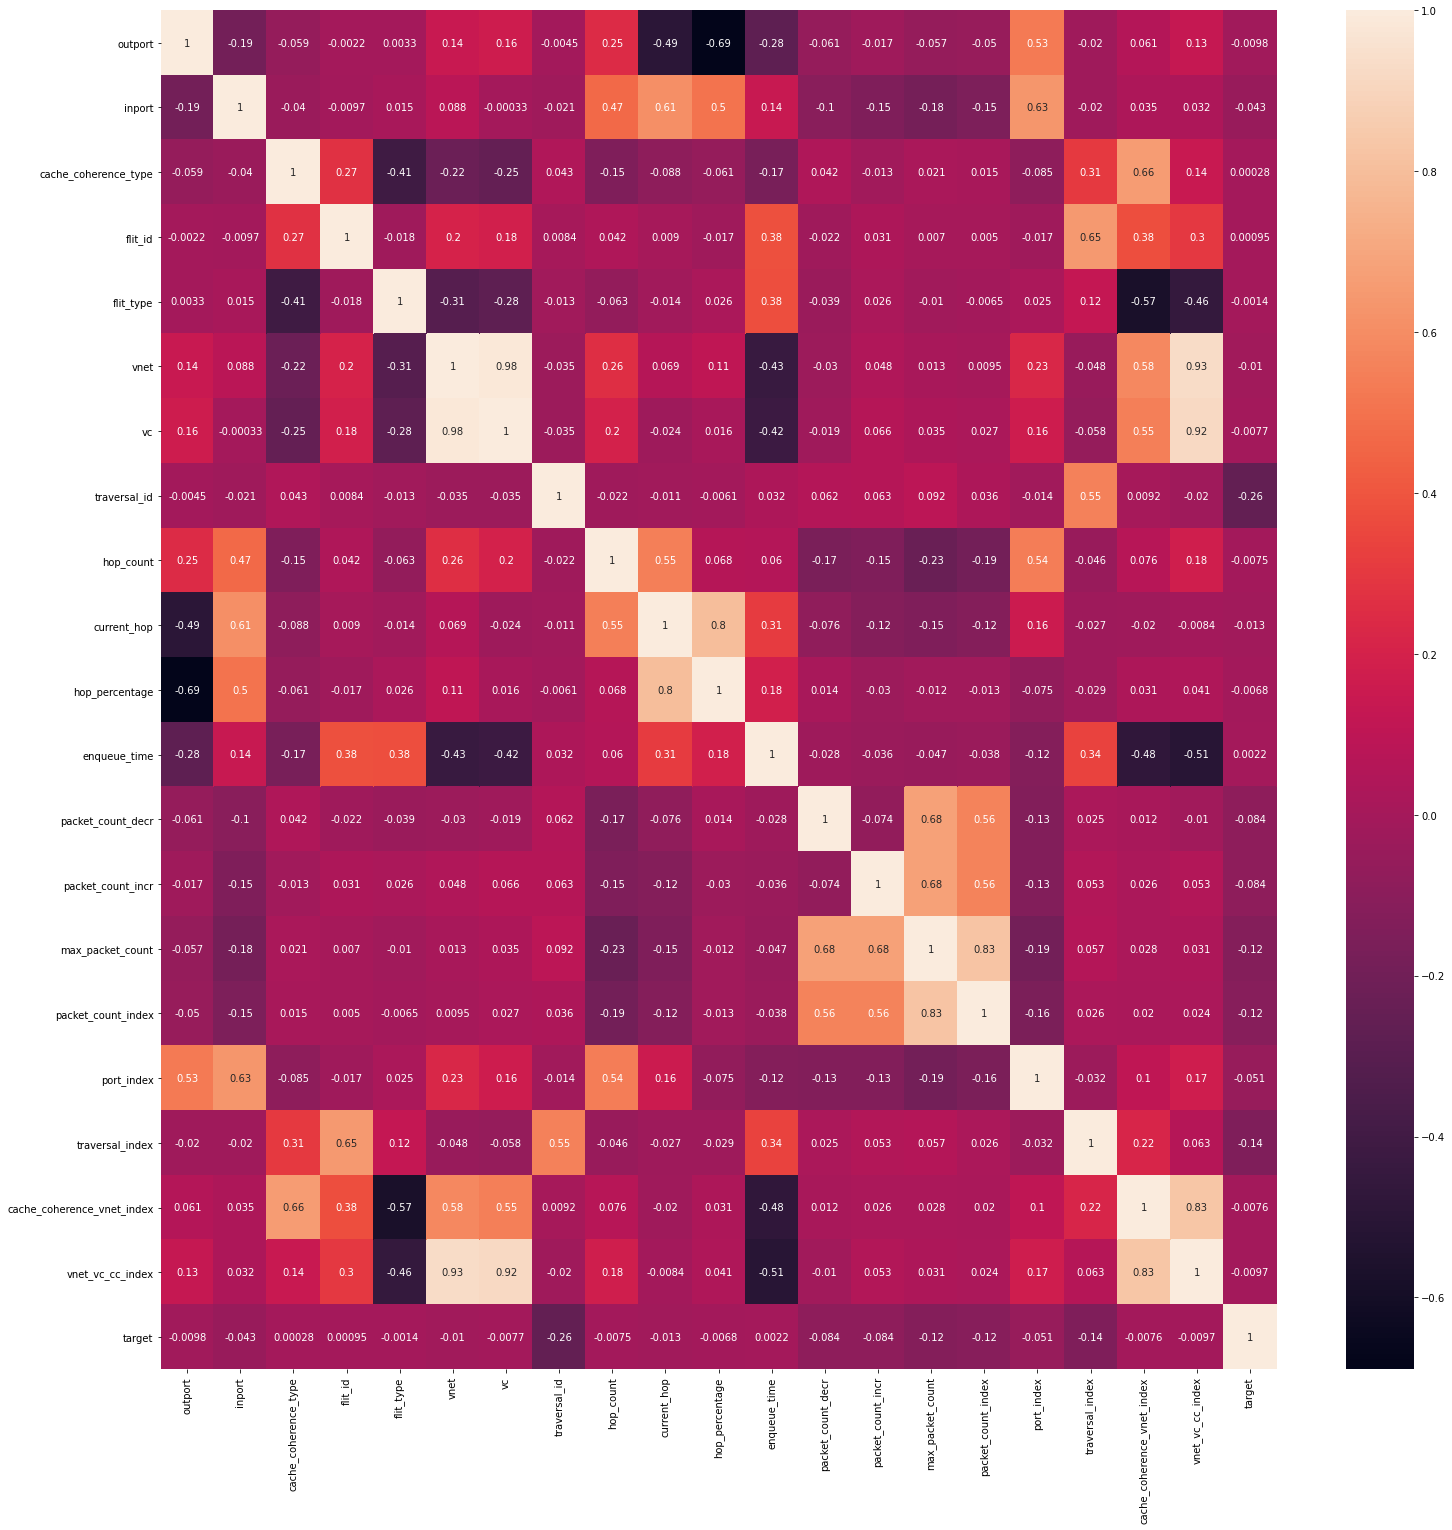

In [23]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [25]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [ ]:
#df = df.drop(columns=[''])

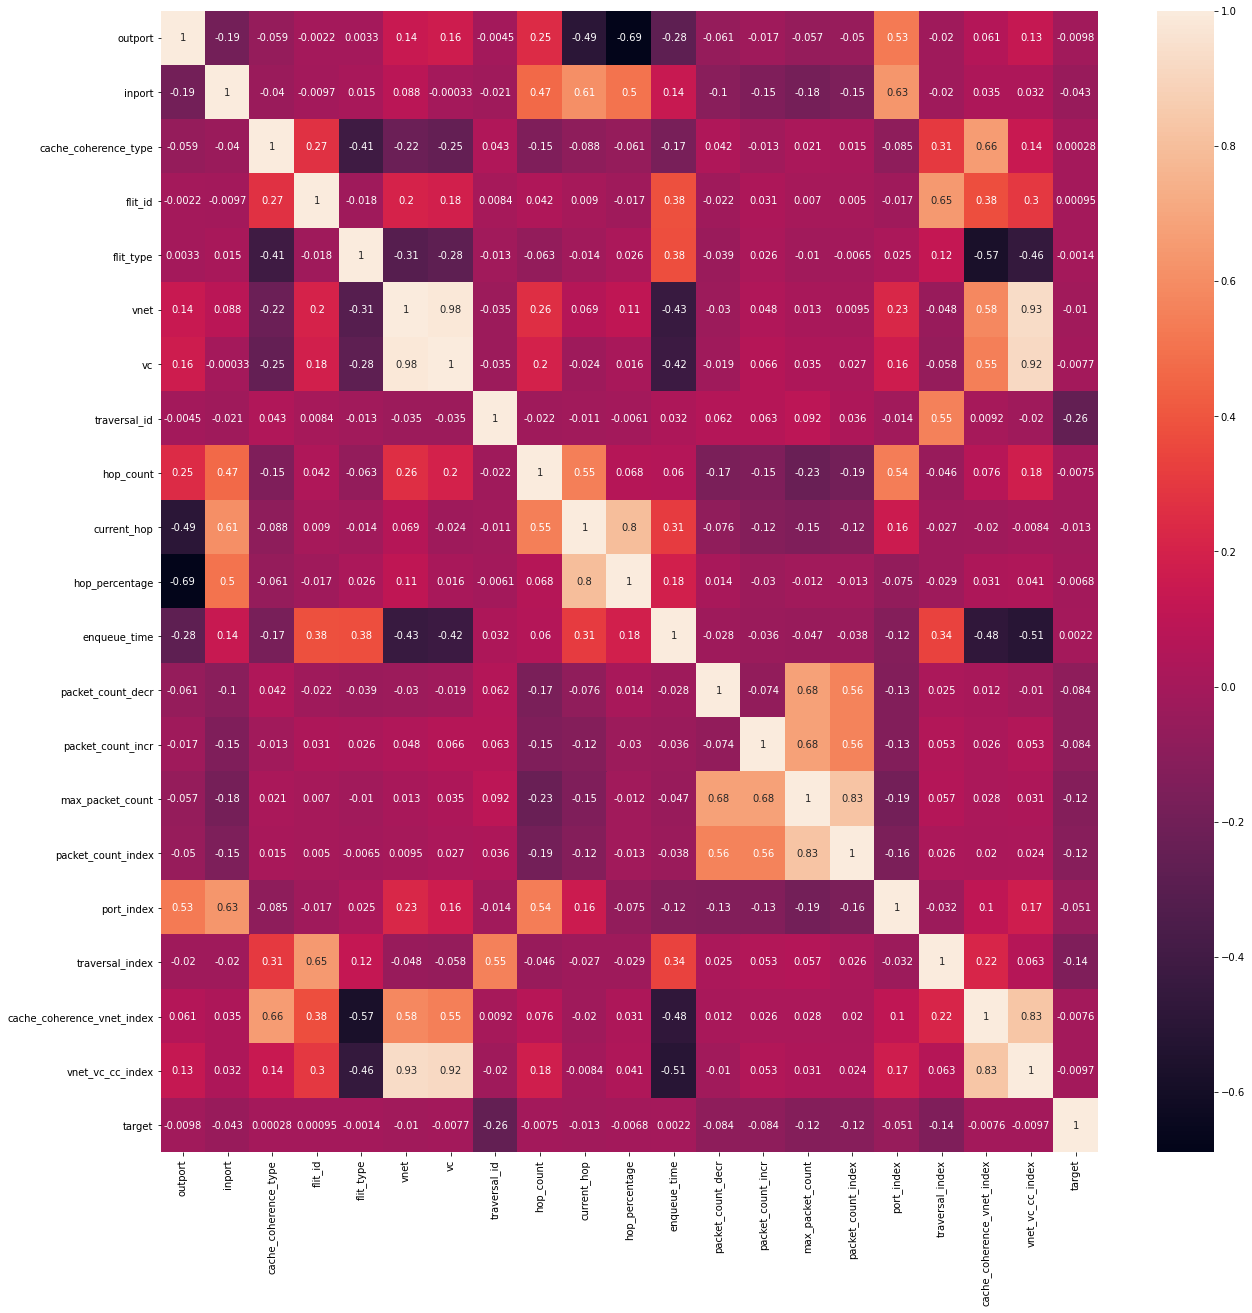

In [27]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

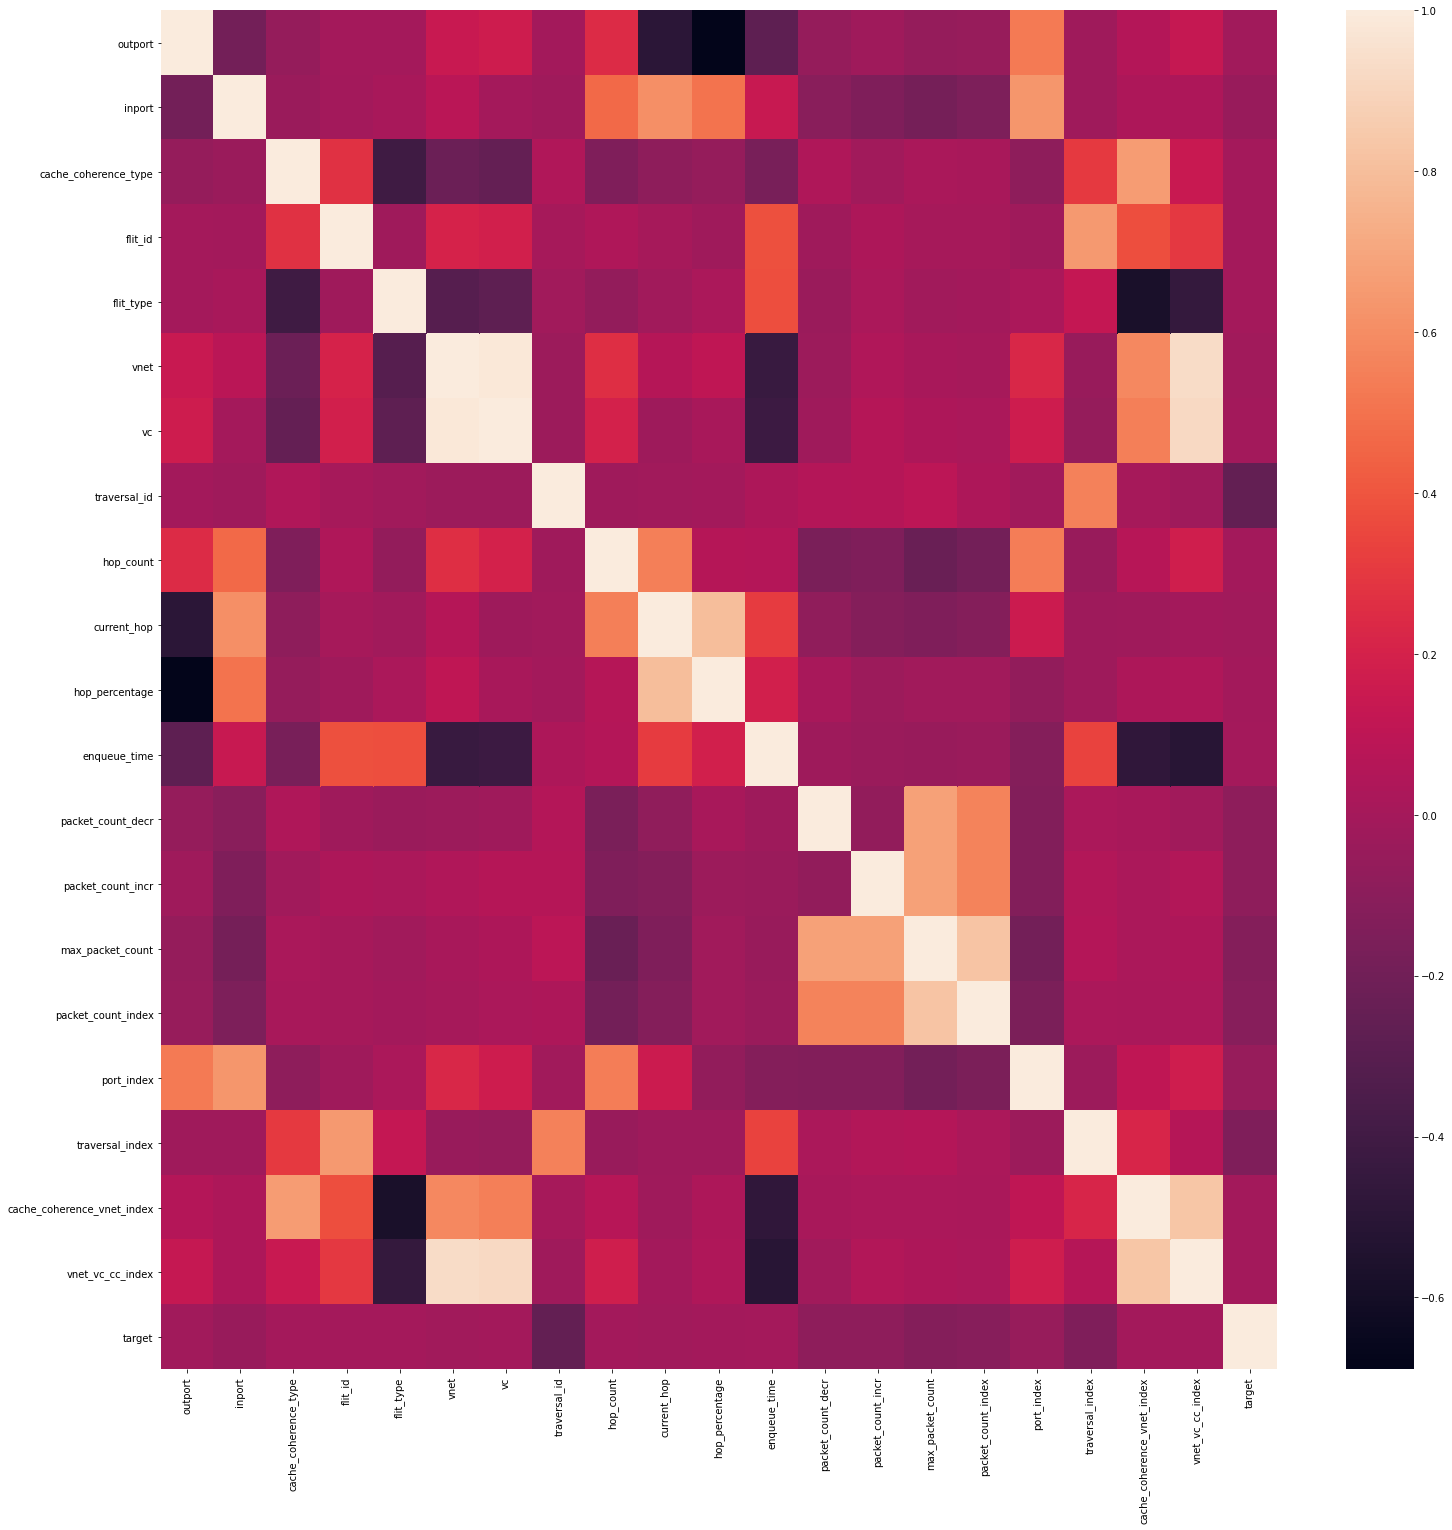

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [ ]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [30]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.2,0.00,0.000000,0.000000,0.550725,0.000000,0.550725,0.010441,0.000000,0.000001,0.000000,0.000000
1,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.2,0.00,0.000000,0.000000,0.628019,0.000000,0.628019,0.011906,0.000000,0.000003,0.000000,0.000000
2,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.2,0.00,0.000000,0.000000,0.483092,0.000000,0.483092,0.009158,0.000000,0.000001,0.000000,0.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.6,0.50,0.666667,0.125000,0.314010,0.000000,0.314010,0.005953,0.666667,0.000001,0.000000,0.000000
4,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.6,0.50,0.666667,0.125000,0.386473,0.000000,0.386473,0.007327,0.666667,0.000001,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764425,0.5,0.0,0.833333,0.75,0.333333,0.0,0.111111,0.999967,0.2,0.00,0.000000,0.328125,0.019324,0.125604,0.144928,0.012272,0.000000,0.533333,0.833333,0.459459
764426,0.5,0.0,0.833333,1.00,0.666667,0.0,0.111111,0.999967,0.2,0.00,0.000000,0.437500,0.014493,0.130435,0.144928,0.010166,0.000000,1.000000,0.833333,0.459459
764427,0.5,0.0,0.166667,0.00,1.000000,0.0,0.222222,1.000000,0.2,0.00,0.000000,0.437500,0.009662,0.135266,0.144928,0.007876,0.000000,0.088890,0.166667,0.117117
764428,0.5,0.0,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.6,0.00,0.000000,0.031250,0.004831,0.140097,0.144928,0.005403,0.000000,0.311110,1.000000,0.675676


In [31]:
train_X[train_X.duplicated()].shape

(3218, 20)

In [32]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,1.0,0.5,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.75,0.25,0.25,0.060606,0.513699,0.000000,0.513699,0.013699,0.666667,0.000000,0.944444,0.939940
1,1.0,0.5,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.075758,0.506849,0.006849,0.513699,0.027215,0.666667,0.000004,0.944444,0.939940
2,1.0,0.5,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.090909,0.500000,0.013699,0.513699,0.040365,0.666667,0.000007,0.944444,0.939940
3,1.0,0.5,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.106061,0.493151,0.020548,0.513699,0.053151,0.666667,0.000010,0.944444,0.939940
4,1.0,0.5,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.75,0.25,0.25,0.166667,0.486301,0.027397,0.513699,0.065571,0.666667,0.000021,0.944444,0.939940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53629,0.5,0.0,0.833333,0.75,0.333333,0.0,0.111111,0.999967,0.00,0.00,0.00,0.318182,0.027397,0.178082,0.205479,0.024475,0.000000,0.533333,0.833333,0.459459
53630,0.5,0.0,0.833333,1.00,0.666667,0.0,0.111111,0.999967,0.00,0.00,0.00,0.424242,0.020548,0.184932,0.205479,0.020274,0.000000,1.000000,0.833333,0.459459
53631,0.5,0.0,0.166667,0.00,1.000000,0.0,0.222222,1.000000,0.00,0.00,0.00,0.424242,0.013699,0.191781,0.205479,0.015708,0.000000,0.088890,0.166667,0.117117
53632,0.5,0.0,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.50,0.00,0.00,0.015152,0.006849,0.198630,0.205479,0.010776,0.000000,0.311110,1.000000,0.675676


In [33]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [34]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [35]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [36]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [37]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [38]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [39]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [41]:
train_Y = df['target']
train_Y.value_counts()

0    559546
1    204884
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [ ]:
seed = 5
np.random.seed(seed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  7042.086467
17             traversal_index  2230.235019
14            max_packet_count  1099.297010
15          packet_count_index  1028.413250
12           packet_count_decr   555.395348
13           packet_count_incr   543.929038
16                  port_index   453.877402
1                       inport   277.692072
5                         vnet    41.856107
6                           vc    16.880106
9                  current_hop    15.201836
0                      outport    14.648585
19            vnet_vc_cc_index    11.081688
10              hop_percentage     6.124531
18  cache_coherence_vnet_index     3.692540
8                    hop_count     3.652415
11                enqueue_time     0.459084


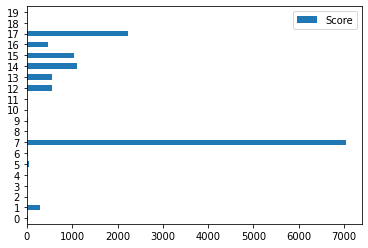

In [44]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [ ]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
pickle.dump(dt, open("dt-r6.pickle.dat", 'wb'))

In [ ]:
y_pred_dt= dt.predict(X_test)

In [49]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.01752940099159
Test Prediction Score 94.10344962913544


In [50]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 84.75780288622889
Test Prediction Score 83.36083497672422
Test Prediction Score 87.54545167104057
Test Prediction Score 83.44445232522402
Test Prediction Score 84.929399162528
Test Prediction Score 86.25093793114577
Test Prediction Score 86.43266560302547
Test Prediction Score 85.29305705805665


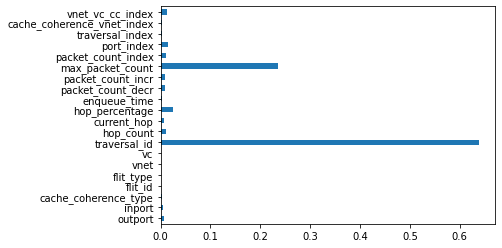

In [51]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

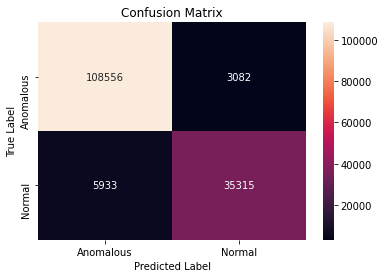

In [52]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    111638
           1       0.92      0.86      0.89     41248

    accuracy                           0.94    152886
   macro avg       0.93      0.91      0.92    152886
weighted avg       0.94      0.94      0.94    152886



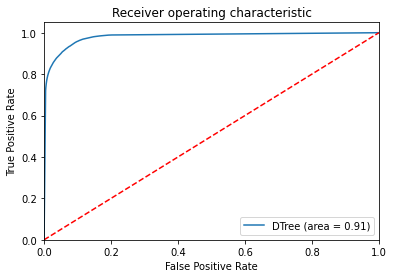

In [54]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [56]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pickle.dump(xgbc, open("xgbc-r6.pickle.dat", 'wb'))

In [ ]:
y_pred_xgbc= xgbc.predict(X_test)

In [59]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99035228863336
Test Prediction Score 99.5467210862996


In [60]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 87.46690532125145
Test Prediction Score 87.28753303551066
Test Prediction Score 89.71448445948083
Test Prediction Score 87.5724046622692
Test Prediction Score 87.70084721004966
Test Prediction Score 89.23860161525863
Test Prediction Score 87.97100592881483
Test Prediction Score 90.01553354969349


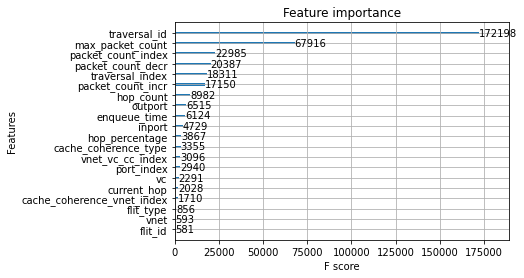

In [61]:
plot_importance(xgbc)
plt.show()

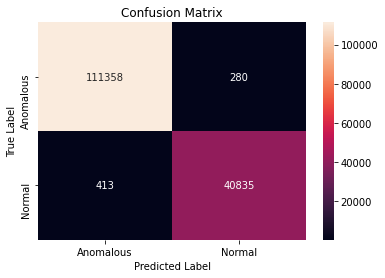

In [62]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    111638
           1       0.99      0.99      0.99     41248

    accuracy                           1.00    152886
   macro avg       0.99      0.99      0.99    152886
weighted avg       1.00      1.00      1.00    152886



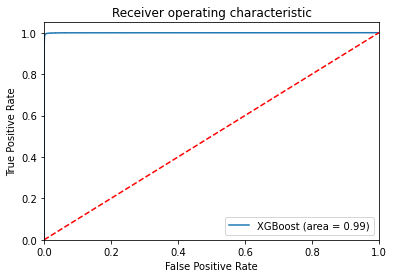

In [64]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()